## Classification of heart disease dataset imported from UCI database for Cleveland region 

In [ ]:
import torch;
import torch.nn as nn;
import torch.nn.functional as F;
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.model_selection import train_test_split;
from torch.utils.data import TensorDataset,DataLoader;
from sklearn.preprocessing import StandardScaler;
import sklearn.metrics as skm;
import copy;


In [ ]:
num_epochs=50;

In [ ]:
heart_disease_data=pd.read_csv('processed.cleveland.data',sep=',',names=['age','sex','cp','trestbps','chol','fbs','restecg','thalatch','exang','oldpeak','slope','ca','thal','num'])

In [ ]:
heart_disease_data.num=(heart_disease_data.num!=0);
heart_disease_data.num=heart_disease_data.num.astype(float)

In [ ]:
heart_disease_data.num.value_counts()

0.0    164
1.0    139
Name: num, dtype: int64

In [ ]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalatch  303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    float64
dtypes: float64(12), object(2)
memory usage: 33.3+ KB


In [ ]:
heart_disease_data.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [ ]:
heart_disease_data.ca=heart_disease_data.ca.apply(lambda x: '0.0' if x=='?' else x )

In [ ]:
heart_disease_data.ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [ ]:
heart_disease_data.ca=pd.to_numeric(heart_disease_data.ca)

In [ ]:
heart_disease_data.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [ ]:
heart_disease_data.thal=heart_disease_data.thal.apply(lambda x: '3.0' if x=='?' else x )

In [ ]:
heart_disease_data.thal.value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [ ]:
heart_disease_data.thal=pd.to_numeric(heart_disease_data.thal)

In [ ]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalatch  303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


In [ ]:
heart_disease_data=pd.get_dummies(heart_disease_data, columns=['cp','restecg','slope','ca','thal'], drop_first=True,dtype=float);


In [ ]:
heart_disease_data=heart_disease_data.astype('float32')

In [ ]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float32
 1   sex          303 non-null    float32
 2   trestbps     303 non-null    float32
 3   chol         303 non-null    float32
 4   fbs          303 non-null    float32
 5   thalatch     303 non-null    float32
 6   exang        303 non-null    float32
 7   oldpeak      303 non-null    float32
 8   num          303 non-null    float32
 9   cp_2.0       303 non-null    float32
 10  cp_3.0       303 non-null    float32
 11  cp_4.0       303 non-null    float32
 12  restecg_1.0  303 non-null    float32
 13  restecg_2.0  303 non-null    float32
 14  slope_2.0    303 non-null    float32
 15  slope_3.0    303 non-null    float32
 16  ca_1.0       303 non-null    float32
 17  ca_2.0       303 non-null    float32
 18  ca_3.0       303 non-null    float32
 19  thal_6.0

In [ ]:
train_data,val_test_data=train_test_split(heart_disease_data,test_size=0.2,random_state=0,stratify=heart_disease_data.num);

In [ ]:
train_data.describe()

,age,sex,trestbps,chol,fbs,thalatch,exang,oldpeak,num,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,54.595043,0.661157,131.830582,247.723145,0.136364,148.557846,0.314050,1.077686,0.458678,0.165289,...,0.500000,0.012397,0.483471,0.466942,0.078512,0.219008,0.123967,0.070248,0.057851,0.371901
std,8.936455,0.474297,18.022123,52.534695,0.343886,23.158815,0.465098,1.199411,0.499322,0.372211,...,0.501036,0.110877,0.500762,0.499940,0.269534,0.414431,0.330227,0.256094,0.233946,0.484314
min,34.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,132.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,243.500000,0.000000,152.000000,0.000000,0.800000,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,165.000000,1.000000,1.800000,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,195.000000,1.000000,6.200000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler=StandardScaler();
train_data[['age','trestbps','chol','thalatch','oldpeak']]=scaler.fit_transform(train_data[['age','trestbps','chol','thalatch','oldpeak']]);
val_test_data[['age','trestbps','chol','thalatch','oldpeak']]=scaler.transform(val_test_data[['age','trestbps','chol','thalatch','oldpeak']])

In [ ]:
train_data.describe()

,age,sex,trestbps,chol,fbs,thalatch,exang,oldpeak,num,cp_2.0,...,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
count,2.420000e+02,242.000000,2.420000e+02,2.420000e+02,242.000000,2.420000e+02,242.000000,2.420000e+02,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,9.359407e-09,0.661157,1.970401e-09,6.896405e-09,0.136364,3.940803e-09,0.314050,1.650211e-08,0.458678,0.165289,...,0.500000,0.012397,0.483471,0.466942,0.078512,0.219008,0.123967,0.070248,0.057851,0.371901
std,1.002073e+00,0.474297,1.002073e+00,1.002072e+00,0.343886,1.002072e+00,0.465098,1.002073e+00,0.499322,0.372211,...,0.501036,0.110877,0.500762,0.499940,0.269534,0.414431,0.330227,0.256094,0.233946,0.484314
min,-2.309386e+00,0.000000,-2.103469e+00,-2.321807e+00,0.000000,-3.355897e+00,0.000000,-9.003747e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.395225e-01,0.000000,-6.578081e-01,-7.004752e-01,0.000000,-7.164516e-01,0.000000,-9.003747e-01,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.575424e-01,1.000000,-1.017845e-01,-8.055426e-02,0.000000,1.489404e-01,0.000000,-2.319984e-01,0.000000,0.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.182080e-01,1.000000,4.542391e-01,5.202922e-01,0.000000,7.114451e-01,1.000000,6.034720e-01,1.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.512338e+00,1.000000,3.790380e+00,6.032820e+00,1.000000,2.009533e+00,1.000000,4.279542e+00,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train=train_data.drop(columns=['num'])
y_train=train_data[['num']]
X_val_test=val_test_data.drop(columns=['num'])
y_val_test=val_test_data[['num']]

In [ ]:
X_val,X_test,y_val,y_test=train_test_split(X_val_test,y_val_test,test_size=0.5,stratify=y_val_test)

In [ ]:
X_train_data=torch.tensor(X_train.values);
X_val_data=torch.tensor(X_val.values);
X_test_data=torch.tensor(X_test.values);
y_train_data=torch.tensor(y_train.values);
y_val_data=torch.tensor(y_val.values);
y_test_data=torch.tensor(y_test.values);

In [ ]:
print(X_train_data.shape)
print(X_val_data.shape)
print(X_test_data.shape)
print(y_train_data.shape)
print(y_val_data.shape)
print(y_test_data.shape)

torch.Size([242, 20])
torch.Size([30, 20])
torch.Size([31, 20])
torch.Size([242, 1])
torch.Size([30, 1])
torch.Size([31, 1])


In [ ]:
train_tensor=TensorDataset(X_train_data,y_train_data);
train_batch=DataLoader(train_tensor,batch_size=16,drop_last=True,shuffle=True)

In [ ]:
def createModel(num_hidden_nodes,num_hidden_layers):
  class ANN_Model(nn.Module):
    def __init__(self,num_hidden_nodes,num_hidden_layers):
      super().__init__();
      self.layer=nn.ModuleDict();
      self.layer['input']=nn.Linear(X_train_data.shape[1],num_hidden_nodes);
      self.num_hidden_layers=num_hidden_layers;
      for i in range(num_hidden_layers-1):
        self.layer['hidden_'+str(i+1)]=nn.Linear(num_hidden_nodes,num_hidden_nodes);
      self.layer['output']=nn.Linear(num_hidden_nodes,1);
    
    def forward(self,X):
      temp=F.relu(self.layer['input'](X));
      for i in range(self.num_hidden_layers-1):
        temp=F.relu(self.layer['hidden_'+str(i+1)](temp));
      result=self.layer['output'](temp);
      return result
  model=ANN_Model(num_hidden_nodes,num_hidden_layers);
  optimizer=torch.optim.Adam(model.parameters(),lr=0.001);
  lossfun=nn.BCEWithLogitsLoss();
  return model,optimizer,lossfun;


In [ ]:
def trainHeartDiseaseModel(num_hidden_nodes,num_hidden_layers):
  model,optimizer,lossfun=createModel(num_hidden_nodes,num_hidden_layers);
  train_loss=np.zeros(num_epochs);
  train_acc=np.zeros(num_epochs);
  val_loss=np.zeros(num_epochs);
  val_acc=np.zeros(num_epochs);
  for epochi in range(num_epochs):
    batch_loss=[];
    batch_acc=[];
    model.train();
    for X,y in train_batch:
      yHat=model(X);
      loss=lossfun(yHat,y);
      batch_loss.append(loss.detach().item());
      batch_acc.append(torch.mean(((yHat>0)==y).float()).item()*100);
      optimizer.zero_grad();
      loss.backward();
      optimizer.step();
    train_loss[epochi]=np.mean(batch_loss);
    train_acc[epochi]=np.mean(batch_acc);
    model.eval();
    with torch.no_grad():
      yHat_val=model(X_val_data);
      val_loss[epochi]=lossfun(yHat_val,y_val_data).detach().item();
      val_acc[epochi]=torch.mean(((yHat_val>0)==y_val_data).float()).item()*100;
  return model,train_loss,val_loss,train_acc,val_acc


In [ ]:
train_losses=np.zeros([6,6]);
val_losses=np.zeros([6,6]);
train_accuracies=np.zeros([6,6]);
val_accuracies=np.zeros([6,6]);
max_val_acc=0;
for log2_n_units in range(6):
  for n_hidden in range(1,7):

    model,train_loss,val_loss,train_acc,val_acc=trainHeartDiseaseModel(2**log2_n_units,n_hidden);
    train_losses[log2_n_units][n_hidden-1]=np.mean(train_loss[num_epochs-10:])
    val_losses[log2_n_units][n_hidden-1]=np.mean(val_loss[num_epochs-10:])
    train_accuracies[log2_n_units][n_hidden-1]=np.mean(train_acc[num_epochs-10:])
    val_accuracies[log2_n_units][n_hidden-1]=np.mean(val_acc[num_epochs-10:])
    if(val_accuracies[log2_n_units][n_hidden-1]>max_val_acc):
      bestModel=copy.deepcopy(model.state_dict());
      max_val_acc=val_accuracies[log2_n_units][n_hidden-1];
      best_n_hidden=n_hidden;
      best_n_units=2**log2_n_units;  
      best_train_loss=train_loss;
      best_val_loss=val_loss;
      best_train_acc=train_acc;
      best_val_acc=val_acc;
      

Text(0.5, 1.0, 'Validation Accuracy')

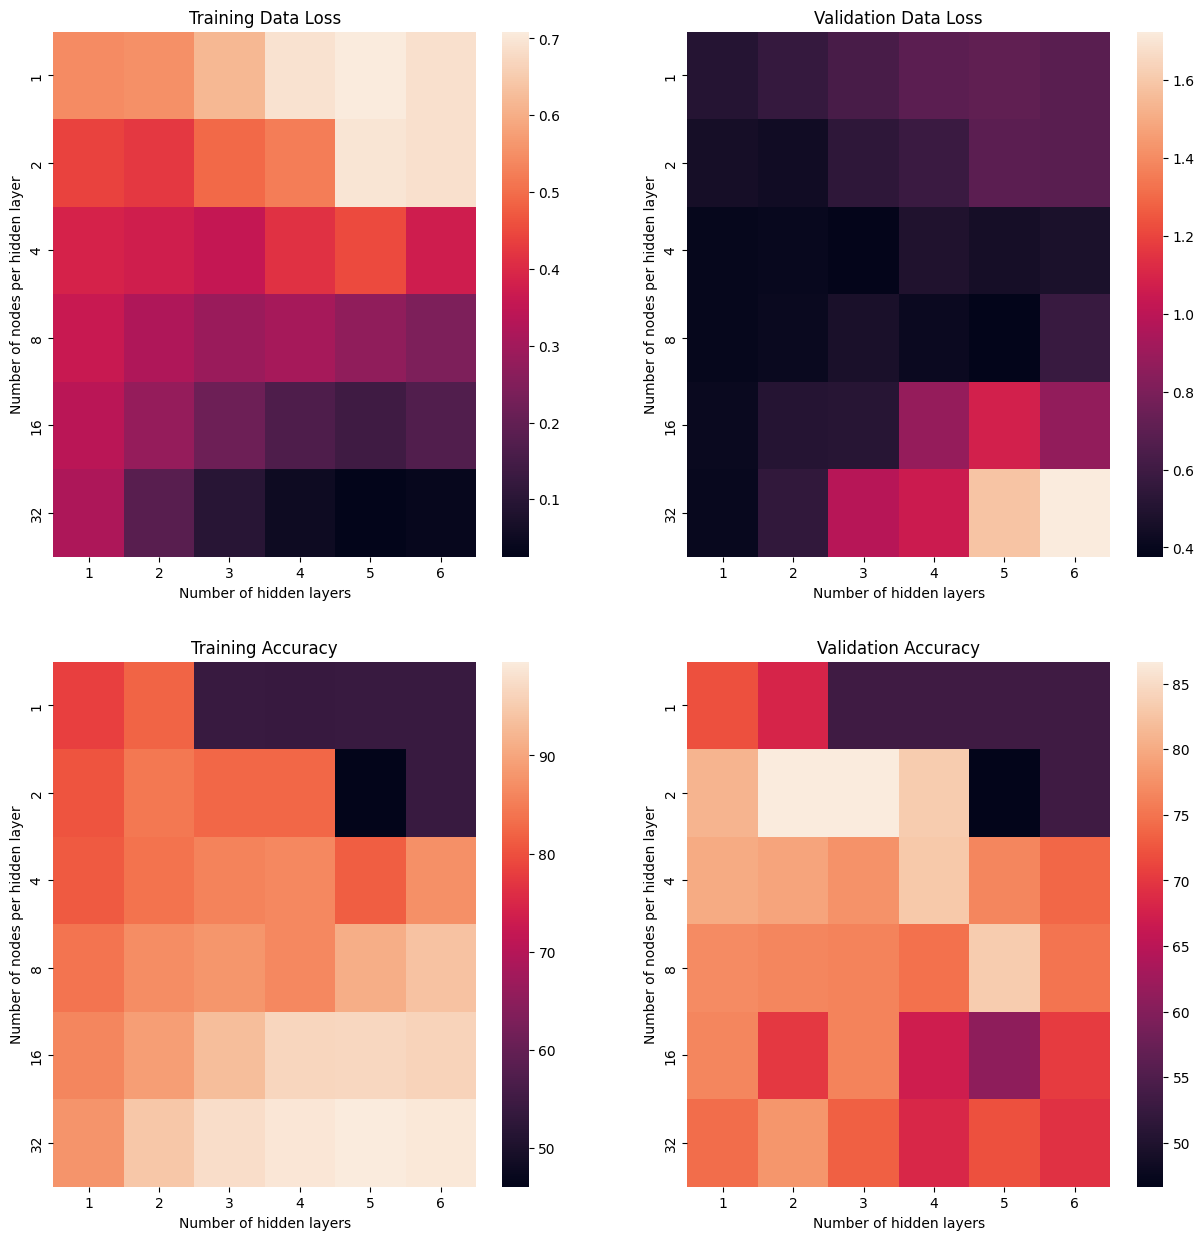

In [ ]:
fig,ax=plt.subplots(2,2,figsize=(15,15));
sns.heatmap(train_losses,ax=ax[0][0]);
ax[0][0].set_yticklabels([2**i for i in range(6)]);
ax[0][0].set_xticklabels(range(1,7));
ax[0][0].set_ylabel('Number of nodes per hidden layer')
ax[0][0].set_xlabel('Number of hidden layers')
ax[0][0].set_title('Training Data Loss')

sns.heatmap(val_losses,ax=ax[0][1]);
ax[0][1].set_yticklabels([2**i for i in range(6)]);
ax[0][1].set_xticklabels(range(1,7));
ax[0][1].set_ylabel('Number of nodes per hidden layer')
ax[0][1].set_xlabel('Number of hidden layers')
ax[0][1].set_title('Validation Data Loss')

sns.heatmap(train_accuracies,ax=ax[1][0]);
ax[1][0].set_yticklabels([2**i for i in range(6)]);
ax[1][0].set_xticklabels(range(1,7));
ax[1][0].set_ylabel('Number of nodes per hidden layer')
ax[1][0].set_xlabel('Number of hidden layers')
ax[1][0].set_title('Training Accuracy')

sns.heatmap(val_accuracies,ax=ax[1][1]);
ax[1][1].set_yticklabels([2**i for i in range(6)]);
ax[1][1].set_xticklabels(range(1,7));
ax[1][1].set_ylabel('Number of nodes per hidden layer')
ax[1][1].set_xlabel('Number of hidden layers')
ax[1][1].set_title('Validation Accuracy')

In [ ]:
modelHeartDisease=createModel(best_n_units,best_n_hidden)[0];
modelHeartDisease.load_state_dict(bestModel);

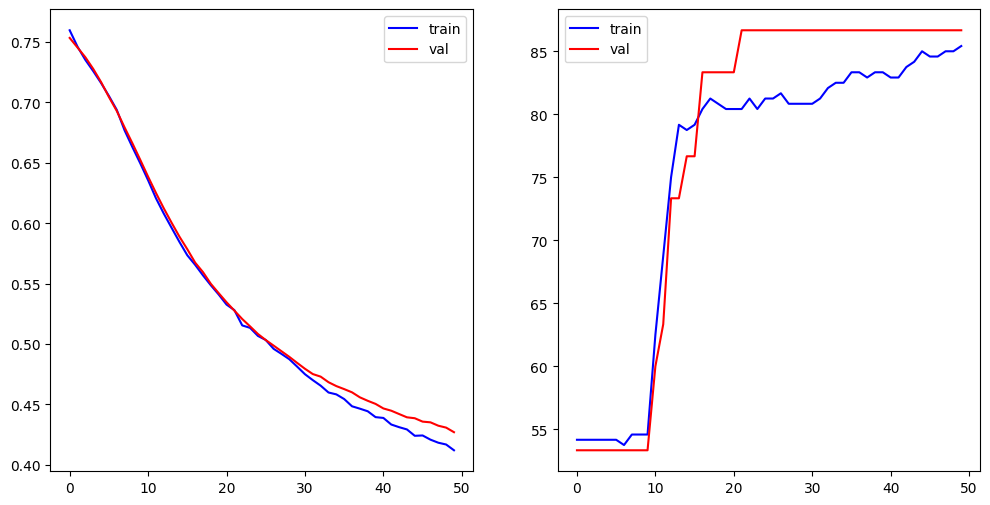

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(12,6));
ax[0].plot(best_train_loss,'b');
ax[0].plot(best_val_loss,'r');
ax[0].legend(['train','val'])
ax[1].plot(best_train_acc,'b');
ax[1].plot(best_val_acc,'r');
ax[1].legend(['train','val'])

In [ ]:
print('Train Accuracy = ',skm.accuracy_score(np.array(y_train_data.T[0]),np.array((modelHeartDisease(X_train_data)>0).detach().T[0])))
print('Validation Accuracy = ',skm.accuracy_score(np.array(y_val_data.T[0]),np.array((modelHeartDisease(X_val_data)>0).detach().T[0])))
print('Test Accuracy = ',skm.accuracy_score(np.array(y_test_data.T[0]),np.array((modelHeartDisease(X_test_data)>0).detach().T[0])))
print('Train Precision = ',skm.precision_score(np.array(y_train_data.T[0]),np.array((modelHeartDisease(X_train_data)>0).detach().T[0])))
print('Validation Precision = ',skm.precision_score(np.array(y_val_data.T[0]),np.array((modelHeartDisease(X_val_data)>0).detach().T[0])))
print('Test Precision = ',skm.precision_score(np.array(y_test_data.T[0]),np.array((modelHeartDisease(X_test_data)>0).detach().T[0])))
print('Train Recall = ',skm.recall_score(np.array(y_train_data.T[0]),np.array((modelHeartDisease(X_train_data)>0).detach().T[0])))
print('Validation Recall = ',skm.recall_score(np.array(y_val_data.T[0]),np.array((modelHeartDisease(X_val_data)>0).detach().T[0])))
print('Test Recall = ',skm.recall_score(np.array(y_test_data.T[0]),np.array((modelHeartDisease(X_test_data)>0).detach().T[0])))
print('Train F1 = ',skm.f1_score(np.array(y_train_data.T[0]),np.array((modelHeartDisease(X_train_data)>0).detach().T[0])))
print('Validation F1 = ',skm.f1_score(np.array(y_val_data.T[0]),np.array((modelHeartDisease(X_val_data)>0).detach().T[0])))
print('Test F1 = ',skm.f1_score(np.array(y_test_data.T[0]),np.array((modelHeartDisease(X_test_data)>0).detach().T[0])))

Train Accuracy =  0.8512396694214877
Validation Accuracy =  0.8666666666666667
Test Accuracy =  0.9354838709677419
Train Precision =  0.8504672897196262
Validation Precision =  0.8571428571428571
Test Precision =  0.9285714285714286
Train Recall =  0.8198198198198198
Validation Recall =  0.8571428571428571
Test Recall =  0.9285714285714286
Train F1 =  0.8348623853211008
Validation F1 =  0.8571428571428571
Test F1 =  0.9285714285714286


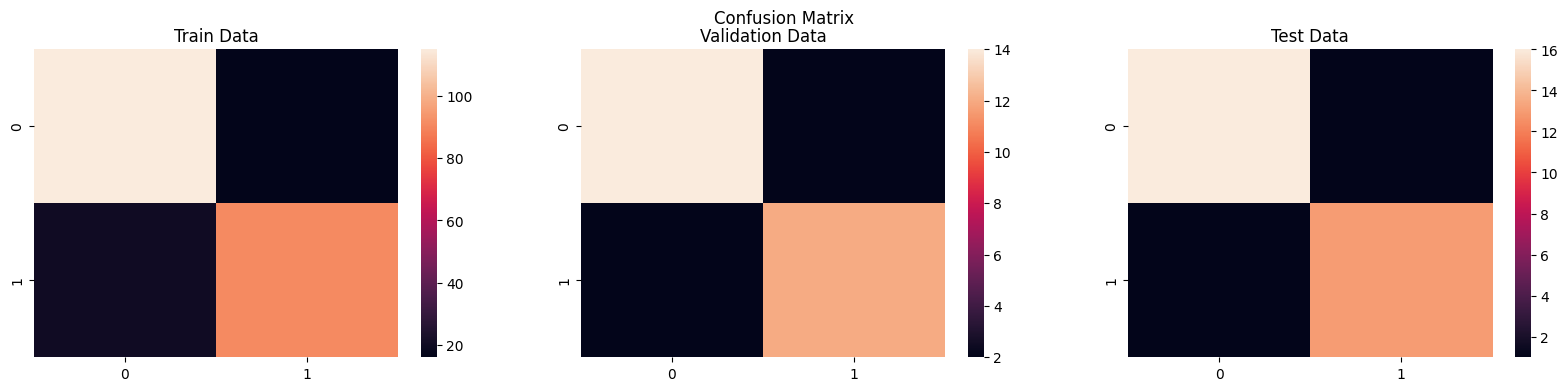

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(20,4));
sns.heatmap(skm.confusion_matrix(np.array(y_train_data.T[0]),np.array((modelHeartDisease(X_train_data)>0).detach().T[0])),ax=ax[0]);
ax[0].set_title('Train Data');
sns.heatmap(skm.confusion_matrix(np.array(y_val_data.T[0]),np.array((modelHeartDisease(X_val_data)>0).detach().T[0])),ax=ax[1]);
ax[1].set_title('Validation Data');
sns.heatmap(skm.confusion_matrix(np.array(y_test_data.T[0]),np.array((modelHeartDisease(X_test_data)>0).detach().T[0])),ax=ax[2]);
ax[2].set_title('Test Data');
fig.suptitle('Confusion Matrix');

In [ ]:
#torch.save(bestModel,'heart_disease_model.pt')